<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Theory and Distributions

**Probability Basics**

- Conditional Probability:

    The Probability of an event A given that event B has occured

$P(A \mid B) = \frac{P(A \cap B)}{P(B)}$

- Bayes' Theorm:

$P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)}$

  P(A) : Prior Probability

  P(B | A) : Likelihood

  P(B) : Evidence


**Common Probability Distributions**

- Gaussian(Normal)Distribution

  - Bell-Shaped curve with mean ($\mu$) and Standard deviation ($\sigma$)

  $f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$

- Bernoulli Distribution

  - Describes outcomes of a Binary experiment
$$
P(X = 1) = p, P(X = 0) = 1 - p
$$

- Binomial Distribution

  - Models the number of successes in n independent Bernoulli trials

  The probability of getting exactly k successes in n independent trials (Binomial distribution) is:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

where
- \( n \) = number of trials  
- \( k \) = number of successes  
- \( p \) = probability of success  
- \( 1-p \) = probability of failure  

- Poisson Distribution
  
  - Models the number of events in a fixed interval of time or space

  The Poisson distribution gives the probability of observing k events in a fixed interval:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$

where
- \( lambda) = average number of events in the interval
- \( k \) = number of occurrences
- \( e \) = Euler's number (~2.71828)










In [ ]:
def bayes_theorm(prior, likelihood, evidence):
    return (likelihood * prior) / evidence

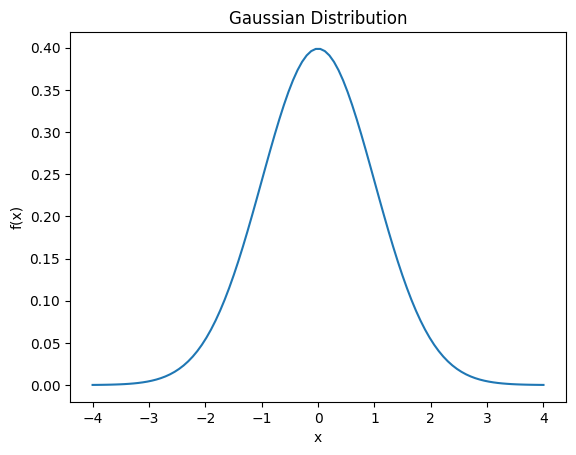

In [ ]:
# Gaussian Distribution
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 0, 1
x = np.linspace(-4, 4, 100)
y = (1 / (np.sqrt(2 * np.pi * sigma ** 2))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, y)
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

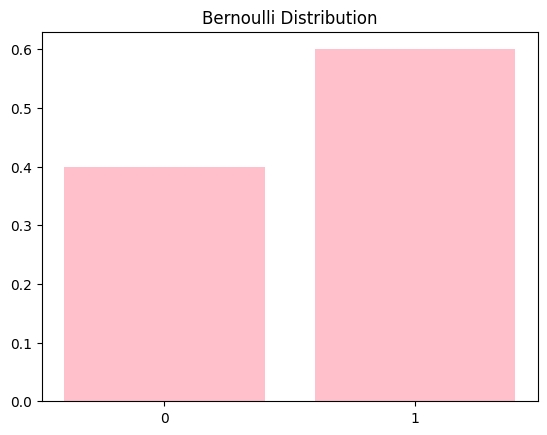

In [ ]:
# Bernoulli Distribution
p = 0.6
plt.bar([0, 1], [1-p, p], color = "pink")
plt.title("Bernoulli Distribution")
plt.xticks([0, 1], label = ["0 (Failure)", "1 (Success)"])
plt.show()

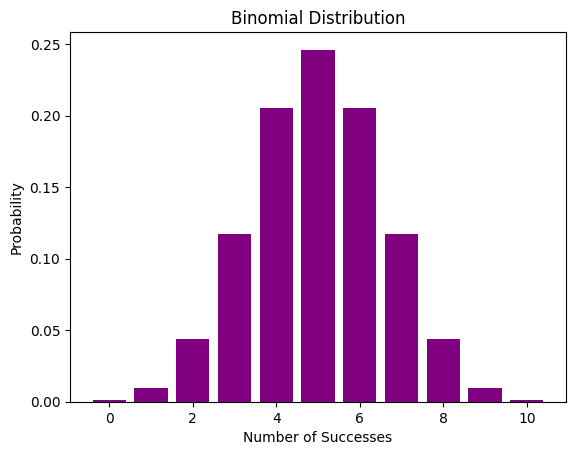

In [ ]:
# Binomial Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
n, p = 10, 0.5
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)
plt.bar(x, y, color = "purple")
plt.title("Binomial Distribution")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()

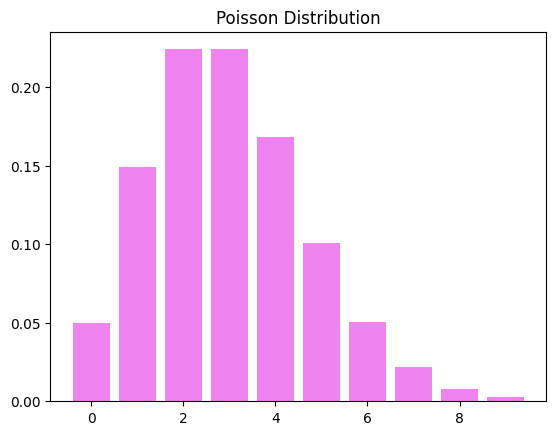

In [ ]:
# Poisson Distribution
from scipy.stats import poisson
import matplotlib.pyplot
import numpy as np
lam = 3
x = np.arange(0, 10)
y = poisson.pmf(x, lam)
plt.bar(x, y, color = "violet")
plt.title("Poisson Distribution")
plt.show()

**Applications in Machine Learning**

- Gaussian Distribution

  - Used in Gaussian Naive Bayes and Kernal density estimation

- Bernoulli Distribution

  - Models Binary Classification problems

- Binomial Distribution

  - Used in Logistic Regression to model binary outcomes

- Poisson Distribution

  - Models count data

**Exercise 1 :- Calculate Probabilities using Bayes' Theorm**

In [ ]:
# Problem
# - A disease affects 1% of a population
# - A test is 95% accurate for diseased individuals and 90% accurate for non-diseased individuals
# - Find the probability of having the disease given a positive test result
def bayes_theorm(prior, sensitivity, specificity):
  evidence = sensitivity * prior + (1 - specificity) * (1 - prior)
  posterior = (sensitivity * prior) / evidence
  return posterior
prior = 0.01 #1% prevalence
sensitivity = 0.95 # True Positive rate
specificity = 0.90 # True Negative rate
posterior = bayes_theorm(prior, sensitivity, specificity)
print("Probability of Disease Given Positive Test: \n", posterior)

Probability of Disease Given Positive Test: 
 0.08755760368663597


**Exercise 2 :- Plot and Explore Differnt Probability Distributions**

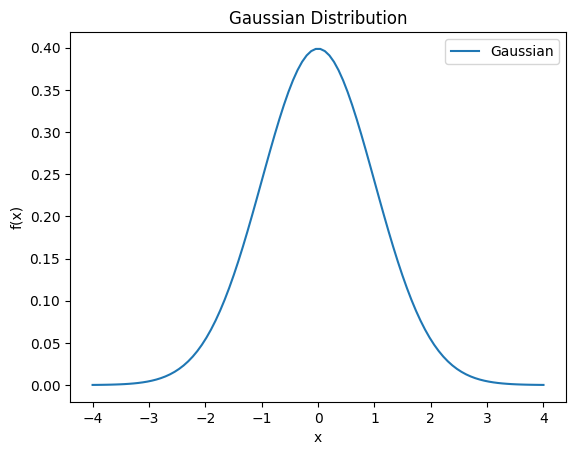

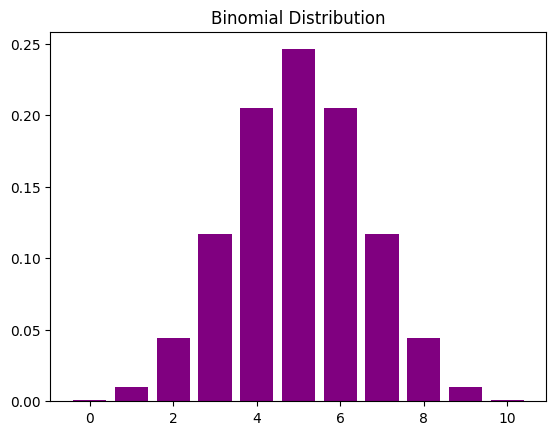

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson
# Gaussian Distribution
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, loc=0, scale = 1)
plt.plot(x, y, label = "Gaussian")
plt.title("Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()
# Binomial Distribution
n, p = 10, 0.5
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)
plt.bar(x, y, color = "purple")
plt.title("Binomial Distribution")
plt.show()

**Additional Practice**
> 1. Create and visualize a multinomial distribution for multi-class data

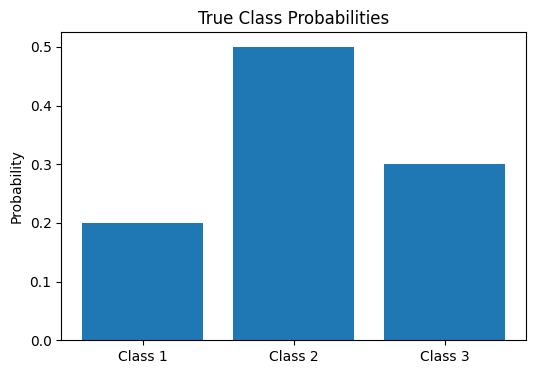

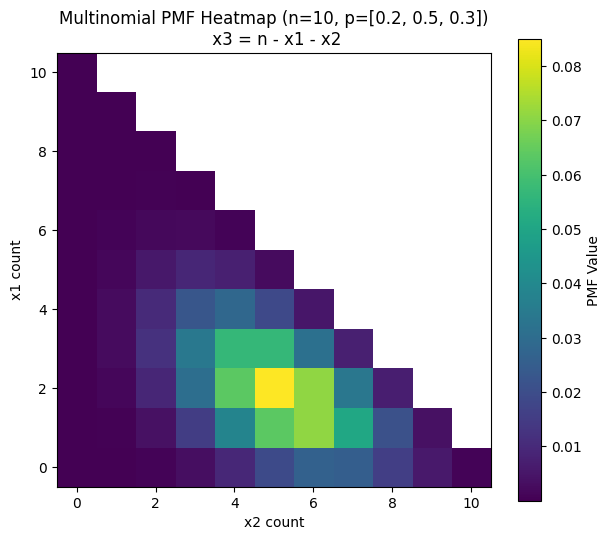

Theoretical expectation: 
 [2. 5. 3.]
Empirical average counts: 
 [2.0108 5.02   2.9692]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
# 1. Multinomial parameters
p = [0.2, 0.5, 0.3]   # class probabilities
n = 10               # number of trials
k = len(p)
# Function to compute PMF
def multinomial_pmf(x, p):
    n = sum(x)
    coeff = factorial(n)
    for xi in x:
        coeff //= factorial(xi)
    val = coeff
    for xi, pi in zip(x, p):
        val *= (pi ** xi)
    return val
# 2. Visualize the class probabilities (bar plot)
plt.figure(figsize=(6,4))
plt.bar(range(k), p)
plt.xticks(range(k), [f"Class {i+1}" for i in range(k)])
plt.ylabel("Probability")
plt.title("True Class Probabilities")
plt.show()
# 3. Create 2D heatmap for multinomial PMF (k=3 only)
if k == 3:
    pmf_grid = np.zeros((n+1, n+1))

    for x1 in range(n+1):
        for x2 in range(n+1):
            if x1 + x2 <= n:
                x3 = n - x1 - x2
                pmf_grid[x1, x2] = multinomial_pmf([x1, x2, x3], p)
            else:
                pmf_grid[x1, x2] = np.nan
    plt.figure(figsize=(7,6))
    plt.imshow(pmf_grid, origin='lower', cmap="viridis")
    plt.colorbar(label="PMF Value")
    plt.xlabel("x2 count")
    plt.ylabel("x1 count")
    plt.title(f"Multinomial PMF Heatmap (n={n}, p={p})\n x3 = n - x1 - x2")
    plt.show()
# 4. Sampling from multinomial distribution
samples = np.random.multinomial(n, p, size=5000)  # 5000 experiments
avg_counts = samples.mean(axis=0)
print("Theoretical expectation: \n", np.array(p)*n)
print("Empirical average counts: \n", avg_counts)

> 2. Compare Gaussian and Unifrom distributions for Continuous data

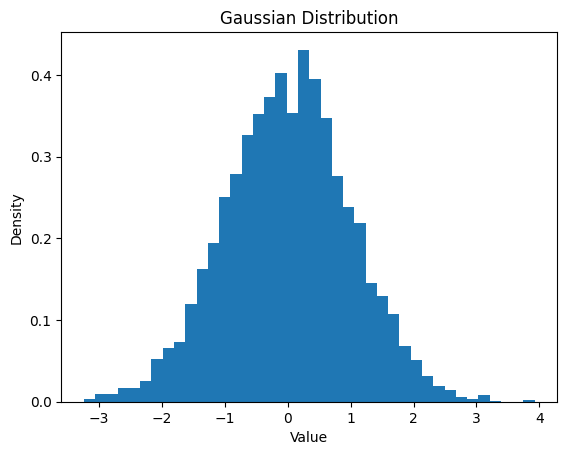

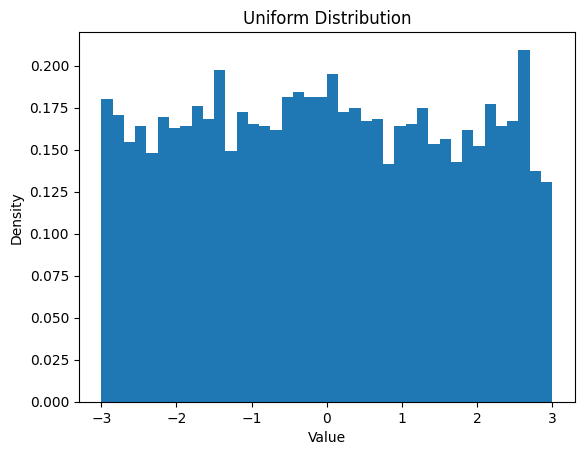

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Generate continuous data
np.random.seed(42)
gaussian_data = np.random.normal(loc=0, scale=1, size=5000)
uniform_data = np.random.uniform(low=-3, high=3, size=5000)
# Plot Gaussian Distribution
plt.hist(gaussian_data, bins=40, density=True)
plt.title("Gaussian Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()
# Plot Uniform Distribution
plt.hist(uniform_data, bins=40, density=True)
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

> 3. Use Probability Distributions to simulate and analyze real-world datasets

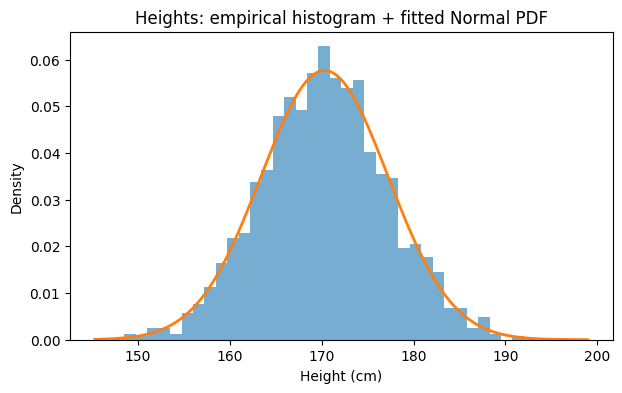

Heights: est_mu=170.32, est_sigma=6.92, KS p-value=0.9657


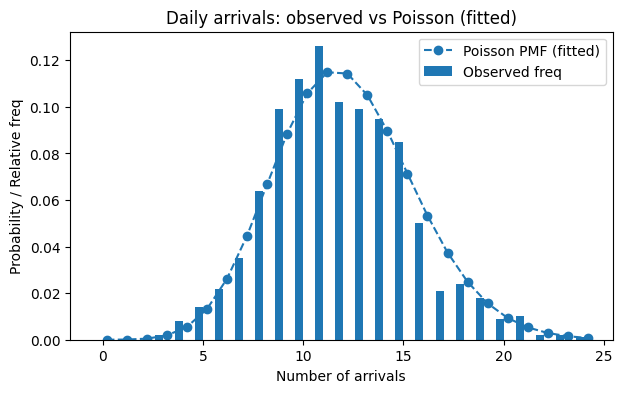

Poisson arrivals: est_lambda=11.95, Chi2 p-value=0.2990 (df=21)


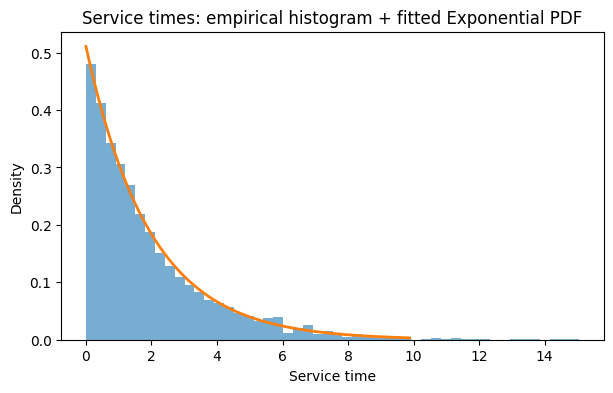

Service times: est_rate=0.511, KS p-value=0.7466


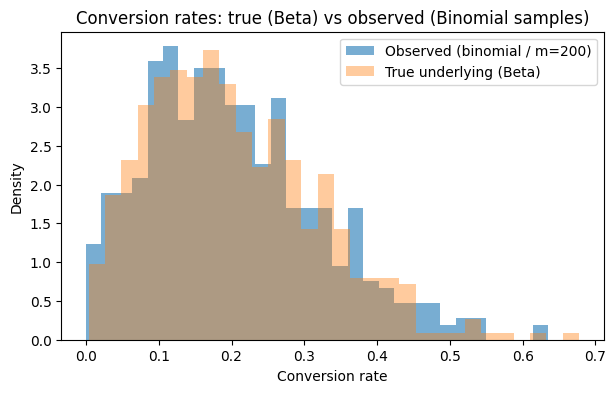

Conversion rates (observed): mean=0.2032, var=0.014129
Beta MoM fit (alpha,beta) ≈ (2.12, 8.33)


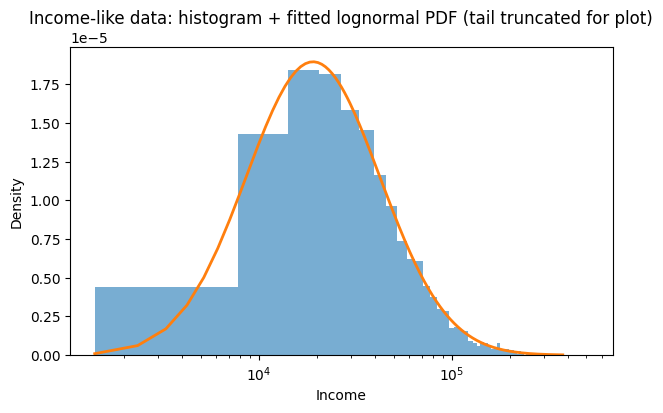

Income fit (lognormal): est_mu=10.497, est_sigma=0.800

Summary:
            dataset     n          model  \
0           heights  2000         Normal   
1          arrivals  1000        Poisson   
2     service_times  3000    Exponential   
3  conversion_rates   500  Beta/Binomial   
4            income  5000      Lognormal   

                                    params            gof  
0                    mu=170.32, sigma=6.92    KS_p=0.9657  
1                             lambda=11.95  Chi2_p=0.2990  
2                               rate=0.511    KS_p=0.7466  
3  beta_mom_alpha=2.12, beta_mom_beta=8.33                 
4             mu_ln=10.497, sigma_ln=0.800                 

Saved summary to 'simulated_distribution_analysis_summary.csv' in working directory.


In [5]:
# Simulate & analyze 'real-world' datasets using probability distributions
# Paste into Colab / Jupyter and run.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(42)
# 1) Heights of people -> Normal distribution
n_heights = 2000
true_mu, true_sigma = 170, 7      # cm
heights = np.random.normal(loc=true_mu, scale=true_sigma, size=n_heights)
# Estimate parameters (MLE for normal: sample mean & std)
est_mu = heights.mean()
est_sigma = heights.std(ddof=0)
# Plot
plt.figure(figsize=(7,4))
plt.hist(heights, bins=40, density=True, alpha=0.6)
x = np.linspace(heights.min()-2, heights.max()+2, 300)
plt.plot(x, stats.norm.pdf(x, loc=est_mu, scale=est_sigma), linewidth=2)
plt.title("Heights: empirical histogram + fitted Normal PDF")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()
# Kolmogorov-Smirnov test (continuous) vs fitted normal
ks_stat, ks_p = stats.kstest((heights - est_mu) / est_sigma, 'norm')
print("Heights: est_mu=%.2f, est_sigma=%.2f, KS p-value=%.4f" % (est_mu, est_sigma, ks_p))
# 2) Daily customer arrivals -> Poisson distribution
n_days = 1000
lambda_daily = 12
arrivals = np.random.poisson(lam=lambda_daily, size=n_days)
# Estimate lambda (sample mean)
est_lambda = arrivals.mean()
# Plot observed frequency vs expected Poisson pmf
max_count = arrivals.max()
counts = np.bincount(arrivals)
xs = np.arange(0, max_count+1)
observed_freq = np.array([np.sum(arrivals == x) for x in xs]) / n_days
expected_prob = stats.poisson.pmf(xs, mu=est_lambda)
plt.figure(figsize=(7,4))
plt.bar(xs-0.2, observed_freq, width=0.4, label="Observed freq")
plt.plot(xs+0.2, expected_prob, marker='o', linestyle='--', label="Poisson PMF (fitted)")
plt.xlabel("Number of arrivals")
plt.ylabel("Probability / Relative freq")
plt.title("Daily arrivals: observed vs Poisson (fitted)")
plt.legend()
plt.show()
# Chi-square goodness-of-fit (discrete) - group tail bins to ensure expected >= 5
from math import ceil
expected_counts = expected_prob * n_days
# combine tail where expected < 5
obs = observed_freq * n_days
mask = expected_counts < 5
if mask.sum() > 0:
    # combine tail into last bin
    last_valid = np.where(~mask)[0].max()
    obs_reduced = np.concatenate([obs[:last_valid+1], [obs[last_valid+1:].sum()] ])
    exp_reduced = np.concatenate([expected_counts[:last_valid+1], [expected_counts[last_valid+1:].sum()] ])
else:
    obs_reduced = obs
    exp_reduced = expected_counts
chi2_stat = ((obs_reduced - exp_reduced)**2 / exp_reduced).sum()
df_chi2 = len(obs_reduced) - 1 - 1  # minus 1 for fitted parameter (lambda)
chi2_p = 1 - stats.chi2.cdf(chi2_stat, df_chi2)
print("Poisson arrivals: est_lambda=%.2f, Chi2 p-value=%.4f (df=%d)" % (est_lambda, chi2_p, df_chi2))
# 3) Service times -> Exponential distribution (memoryless)
n_service = 3000
true_rate = 0.5     # lambda (events per unit time) -> mean = 1/lambda = 2
service_times = np.random.exponential(scale=1/true_rate, size=n_service)
# Estimate rate by MLE: 1 / sample_mean
est_rate = 1.0 / service_times.mean()
# Plot histogram + fitted exponential PDF
plt.figure(figsize=(7,4))
plt.hist(service_times, bins=50, density=True, alpha=0.6)
x = np.linspace(0, np.percentile(service_times, 99.5), 400)
plt.plot(x, stats.expon.pdf(x, scale=1/est_rate), linewidth=2)
plt.title("Service times: empirical histogram + fitted Exponential PDF")
plt.xlabel("Service time")
plt.ylabel("Density")
plt.show()
# KS test vs fitted exponential (use CDF with estimated scale)
exp_ks_stat, exp_ks_p = stats.kstest(service_times, 'expon', args=(0, 1/est_rate))
print("Service times: est_rate=%.3f, KS p-value=%.4f" % (est_rate, exp_ks_p))
# 4) Conversion rates (proportions) -> Beta prior & Binomial outcomes
# simulate varying underlying conversion probabilities with Beta
n_campaigns = 500
# simulate 'true' conversion probabilities using Beta (heterogeneous campaigns)
alpha, beta = 2, 8
true_probs = np.random.beta(alpha, beta, size=n_campaigns)
# for each campaign, run m visitors and get successes
m_visitors = 200
successes = np.array([np.random.binomial(m_visitors, p) for p in true_probs])
observed_rates = successes / m_visitors
# Plot distribution of observed rates and true probs
plt.figure(figsize=(7,4))
plt.hist(observed_rates, bins=30, density=True, alpha=0.6, label="Observed (binomial / m=200)")
plt.hist(true_probs, bins=30, density=True, alpha=0.4, label="True underlying (Beta)")
plt.legend()
plt.title("Conversion rates: true (Beta) vs observed (Binomial samples)")
plt.xlabel("Conversion rate")
plt.ylabel("Density")
plt.show()
# Fit Beta to observed rates using method-of-moments (for illustration)
mean_r = observed_rates.mean()
var_r = observed_rates.var(ddof=0)
# method of moments (note: observed_rates are noisy; this is illustrative)
est_alpha = mean_r * (mean_r * (1-mean_r) / var_r - 1)
est_beta  = (1-mean_r) * (mean_r * (1-mean_r) / var_r - 1)
print("Conversion rates (observed): mean=%.4f, var=%.6f" % (mean_r, var_r))
print("Beta MoM fit (alpha,beta) ≈ (%.2f, %.2f)" % (est_alpha, est_beta))
# 5) Income-like skewed data -> Lognormal
n_income = 5000
true_mu_ln, true_sigma_ln = 10.5, 0.8   # log-space params -> large skew
incomes = np.random.lognormal(mean=true_mu_ln, sigma=true_sigma_ln, size=n_income)
# Fit lognormal via scipy (fit returns shape (sigma), loc, scale)
shape, loc, scale = stats.lognorm.fit(incomes, floc=0)  # fix loc=0 for stability
est_sigma_ln = shape
est_mu_ln = np.log(scale)
plt.figure(figsize=(7,4))
plt.hist(incomes, bins=80, density=True, alpha=0.6)
x = np.linspace(incomes.min(), np.percentile(incomes, 99.9), 400)
plt.plot(x, stats.lognorm.pdf(x, s=est_sigma_ln, loc=0, scale=np.exp(est_mu_ln)), linewidth=2)
plt.title("Income-like data: histogram + fitted lognormal PDF (tail truncated for plot)")
plt.xlabel("Income")
plt.ylabel("Density")
plt.xscale("log")  # better visualize on log scale
plt.show()
print("Income fit (lognormal): est_mu=%.3f, est_sigma=%.3f" % (est_mu_ln, est_sigma_ln))
# Summary table and save results
summary = pd.DataFrame([
    {"dataset": "heights", "n": n_heights, "model": "Normal", "params": f"mu={est_mu:.2f}, sigma={est_sigma:.2f}", "gof": f"KS_p={ks_p:.4f}"},
    {"dataset": "arrivals", "n": n_days, "model": "Poisson", "params": f"lambda={est_lambda:.2f}", "gof": f"Chi2_p={chi2_p:.4f}"},
    {"dataset": "service_times", "n": n_service, "model": "Exponential", "params": f"rate={est_rate:.3f}", "gof": f"KS_p={exp_ks_p:.4f}"},
    {"dataset": "conversion_rates", "n": n_campaigns, "model": "Beta/Binomial", "params": f"beta_mom_alpha={est_alpha:.2f}, beta_mom_beta={est_beta:.2f}", "gof": ""},
    {"dataset": "income", "n": n_income, "model": "Lognormal", "params": f"mu_ln={est_mu_ln:.3f}, sigma_ln={est_sigma_ln:.3f}", "gof": ""}
])
print("\nSummary:")
print(summary)
summary.to_csv("simulated_distribution_analysis_summary.csv", index=False)
print("\nSaved summary to 'simulated_distribution_analysis_summary.csv' in working directory.")
